### Load variables

In [ ]:
import pickle

with open('documents.pkl', 'rb') as f:
    documents = pickle.load(f)
print(f'Loaded {len(documents)} documents from file.')

Loaded 17 documents from file.


In [36]:
from gensim import corpora

# Create a dictionary from the list of tokenized documents
dictionary = corpora.Dictionary(documents)
# Optionally filter out tokens that appear in very few or too many documents
dictionary.filter_extremes(no_below=5, no_above=0.4)
# Create the corpus in the bag-of-words format: a list of (token_id, count) pairs per document
corpus = [dictionary.doc2bow(doc) for doc in documents]

print("Size of dictionary:", len(dictionary))
print("Number of documents (corpus size):", len(corpus))

Size of dictionary: 914
Number of documents (corpus size): 17


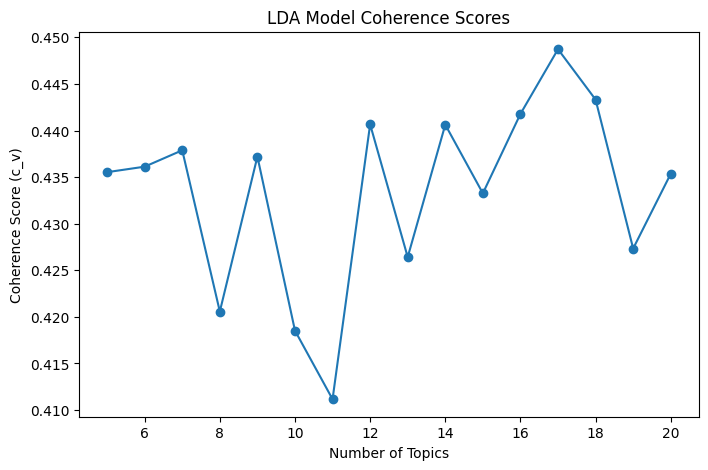

In [37]:
min_topics = 5
max_topics = 20
step = 1

coherence_scores = []
model_list = []

for num in range(min_topics, max_topics + 1, step):

    lda_model = LdaModel(corpus=corpus,
                         num_topics=num,
                         id2word=dictionary,
                         passes=10,
                         random_state=42)
    model_list.append(lda_model)
    
    coherence_model = CoherenceModel(model=lda_model, texts=documents, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model.get_coherence()
    coherence_scores.append(coherence)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(range(min_topics, max_topics + 1, step), coherence_scores, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score (c_v)")
plt.title("LDA Model Coherence Scores")
plt.show()

In [55]:
from gensim.models.ldamodel import LdaModel

# Specify the number of topics you want to extract
num_topics = 9

# Train the LDA model on the corpus using the dictionary
lda_model = LdaModel(corpus=corpus,
                     num_topics=num_topics,
                     id2word=dictionary,
                     passes=10,        # Increase if needed for better convergence
                     alpha='auto',
                     random_state=42)

# Display the topics with the top 10 keywords in each topic
for idx, topic in lda_model.print_topics(num_words=15):
    print(f"Topic #{idx}: {topic}")

Topic #0: 0.065*"香水" + 0.019*"外婆" + 0.011*"嗅覺" + 0.009*"阻止" + 0.009*"內衣" + 0.009*"味兒" + 0.008*"找尋" + 0.008*"教室" + 0.008*"香料" + 0.008*"死掉" + 0.006*"西裝" + 0.006*"偷偷" + 0.006*"葉子" + 0.006*"基礎" + 0.005*"文學"
Topic #1: 0.003*"穿過" + 0.003*"寶貝" + 0.002*"行經" + 0.002*"說話" + 0.002*"廣場" + 0.002*"十六" + 0.002*"地圖" + 0.002*"飯店" + 0.002*"司機" + 0.002*"同性戀" + 0.002*"人民" + 0.002*"屋頂" + 0.002*"公寓" + 0.002*"外婆" + 0.002*"走出"
Topic #2: 0.018*"寶貝" + 0.007*"印度" + 0.005*"講話" + 0.005*"人民" + 0.005*"自我" + 0.005*"神話" + 0.004*"媒體" + 0.004*"聖誕" + 0.004*"說明" + 0.004*"紐約" + 0.004*"同性戀" + 0.004*"造成" + 0.004*"渴望" + 0.004*"反對" + 0.004*"意味"
Topic #3: 0.021*"會兒" + 0.021*"說話" + 0.018*"漂亮" + 0.017*"教室" + 0.016*"讀書" + 0.014*"高高" + 0.014*"長長" + 0.012*"文章" + 0.012*"放學" + 0.011*"模樣" + 0.009*"曉得" + 0.009*"碰到" + 0.009*"天下" + 0.009*"好久" + 0.009*"文學"
Topic #4: 0.013*"日語" + 0.013*"昨晚" + 0.013*"裝潢" + 0.009*"靈魂" + 0.009*"年老" + 0.009*"老年" + 0.009*"伸出" + 0.009*"沙發" + 0.009*"進行" + 0.009*"日文" + 0.009*"鋼琴" + 0.009*"伸手" + 0.009*"明明" + 0.009*"

In [56]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


import numpy as np
doc_topic_distributions = []
for i, bow in enumerate(corpus):
    distribution = lda_model[bow]  
    dist_vector = [0.0] * num_topics
    for topic_id, prop in distribution:
        dist_vector[topic_id] = prop
    doc_topic_distributions.append(dist_vector)

In [ ]:
import os

folder_path = './literature'
file_names = [f for f in os.listdir(folder_path) if f.endswith('.txt')]

titles = []
authors = []
years = []

for file in file_names:
    base_name = file[:-4]  # 移除 '.txt'
    parts = base_name.split('-')
    if len(parts) >= 3:
        title = parts[0]
        author = parts[1]
        year = parts[2]
    else:
        title, author, year = None, None, None
    titles.append(title)
    authors.append(author)
    years.append(year)

In [ ]:
import pandas as pd

topic_columns = [f"Topic_{i}" for i in range(num_topics)]

df = pd.DataFrame(doc_topic_distributions, columns=topic_columns)
df['Title'] = titles
df['Author'] = authors
df['Year'] = years

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df_sorted = df.sort_values('Year')

print(df_sorted.head())

    Topic_0  Topic_1   Topic_2   Topic_3  Topic_4   Topic_5  Topic_6  \
13      0.0      0.0  0.000000  0.999820      0.0  0.000000      0.0   
3       0.0      0.0  0.000000  0.000000      0.0  0.000000      0.0   
12      0.0      0.0  0.000000  0.000000      0.0  0.997783      0.0   
8       0.0      0.0  0.000000  0.000000      0.0  0.998618      0.0   
1       0.0      0.0  0.318134  0.110879      0.0  0.544676      0.0   

     Topic_7  Topic_8   Title Author  Year  
13  0.000000  0.00000     擊壤歌    朱天心  1977  
3   0.998157  0.00000    肉身菩薩    朱天文  1988  
12  0.000000  0.00000     柴師父    朱天文  1988  
8   0.000000  0.00000   尼羅河女兒    朱天文  1989  
1   0.000000  0.02611  帶我去吧月光    朱天文  1989  


   Year  Topic_0  Topic_1   Topic_2  Topic_3  Topic_4   Topic_5  Topic_6  \
0  1977      0.0      0.0  0.000000  0.99982      0.0  0.000000      0.0   
1  1988      0.0      0.0  0.000000  0.00000      0.0  0.498891      0.0   
2  1989      0.0      0.0  0.159067  0.05544      0.0  0.771647      0.0   
3  1990      0.0      0.0  0.499468  0.00000      0.0  0.499626      0.0   
4  1991      0.0      0.0  0.000000  0.00000      0.0  0.998890      0.0   

    Topic_7   Topic_8  
0  0.000000  0.000000  
1  0.499079  0.000000  
2  0.000000  0.013055  
3  0.000000  0.000000  
4  0.000000  0.000000  


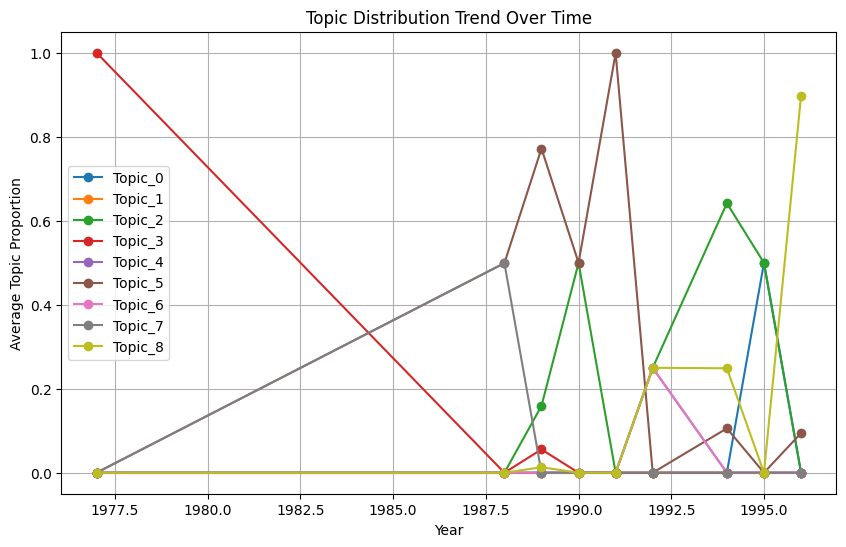

In [ ]:
topic_columns = [f"Topic_{i}" for i in range(num_topics)]

df_grouped = df_sorted.groupby('Year')[topic_columns].mean().reset_index()

print(df_grouped.head())
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for topic in topic_columns:
    plt.plot(df_grouped['Year'], df_grouped[topic], marker='o', label=topic)

plt.xlabel("Year")
plt.ylabel("Average Topic Proportion")
plt.title("Topic Distribution Trend Over Time")
plt.legend(loc="best")
plt.grid(True)
plt.show()